# TME1

In [4]:
from decisiontree import *
from IPython.display import Image
import matplotlib.pyplot as plt

## Exercice 1

In [5]:
#Q1.1

def entropie(vect):
    somme = 0
    c = Counter(vect)
    for label in c:
        p = c[label]/sum(c.values()) 
        somme += p * np.log2(p)
    return -somme

In [6]:
#On teste si la fonction codée donne le même résultat que la fonction fournie

test = np.array([4, 4, 4, 4, 1, 1, 1, 1, 2])

In [7]:
print(entropie(test))
print(entropy(test))

1.3921472236645345
1.3921472236645345


In [8]:
#Q1.2

def entropie_cond(list_vect):
    somme_tot = 0
    c_tot = Counter()
    for vect in list_vect:
        c_tot.update(vect)
        
    for vect in list_vect:
        c = Counter(vect)
        pi = 0
        for label in c:
            pi = sum(c.values())/sum(c_tot.values())
        somme_tot += pi * entropie(vect)
    return somme_tot       

In [9]:
#On teste si la fonction codée donne le même résultat que la fonction fournie

test2 = np.array([np.array([1, 1, 2, 2, 2, 1]), np.array([3, 4, 1])])
test3 = np.array([1, 1, 2, 2, 2, 1, 3, 4, 1])

In [10]:
print(entropie_cond(test2))
print(entropy_cond(test2))
print(entropy(test3))

print(entropy(test3) - entropy_cond(test2))

1.1949875002403854
1.1949875002403854
1.7527152789797045
0.5577277787393191


In [11]:
#Q1.3

import pickle 
import numpy as np 
# data : 
# tableau (films,features)
# id2titles : dictionnaire id -> titre 
# fields : id feature -> nom 

[data, id2titles, fields] = pickle.load(open("imdb_extrait.pkl","rb")) 

# la derniere colonne est le vote 
datax = data[:,:32] 
datay = np.array([1 if x[33] > 6.5 else -1 for x in data]) 

#les colonnes [0:27] sont des genres
#[28]: Duree, [29]: couleur, [30]: annee, [31]: budget, [32]: nb_votes

In [12]:
last_col = 28
ent_moi = entropie(datay)
ent_prof = entropy(datay)

ent_cond_moi = np.zeros(last_col)
ent_cond_prof = np.zeros(last_col)


for col in range(last_col):
    
    ent_cond_moi[col] = entropie_cond([datay[(datax[:, col] == 1)],datay[(datax[:, col] != 1)]])
    ent_cond_prof[col] = entropy_cond([datay[(datax[:, col] == 1)],datay[(datax[:, col] != 1)]])

In [13]:
#On teste si les fonction codées donnent les mêmes résultats que les fonctions fournies

print(np.allclose(ent_moi, ent_prof))
print(np.allclose(ent_cond_moi, ent_cond_prof))

True
True


In [14]:
(ent_prof - ent_cond_prof).argmax()

17

Le meilleur attribut pour la première partition est la catégorie "Drama" (colonne 17). Cette catégorieest la catégorie avec la plus grande difference entre l'entropie et l'entropie conditionnelle et alors celle qui apporte plus d'information.

In [41]:
dt = DecisionTree() 
dt.max_depth = 5 #on fixe la taille de l’arbre a 5 
dt.min_samples_split = 2 #nombre minimum d’exemples pour spliter un noeud 
dt.fit(datax, datay) 
print(dt.predict(datax[:5,:])) 
print(dt.score(datax, datay)) 

[-1, 1, -1, -1, -1]
0.736429038587312


In [12]:
# dessine l’arbre dans un fichier pdf si pydot est installe. 
dt.to_pdf("test_tree.pdf",fields) 
# sinon utiliser http://www.webgraphviz.com/ 

In [13]:
#dt.to_dot(fields) 
#ou dans la console 
#print(dt.print_tree(fields))

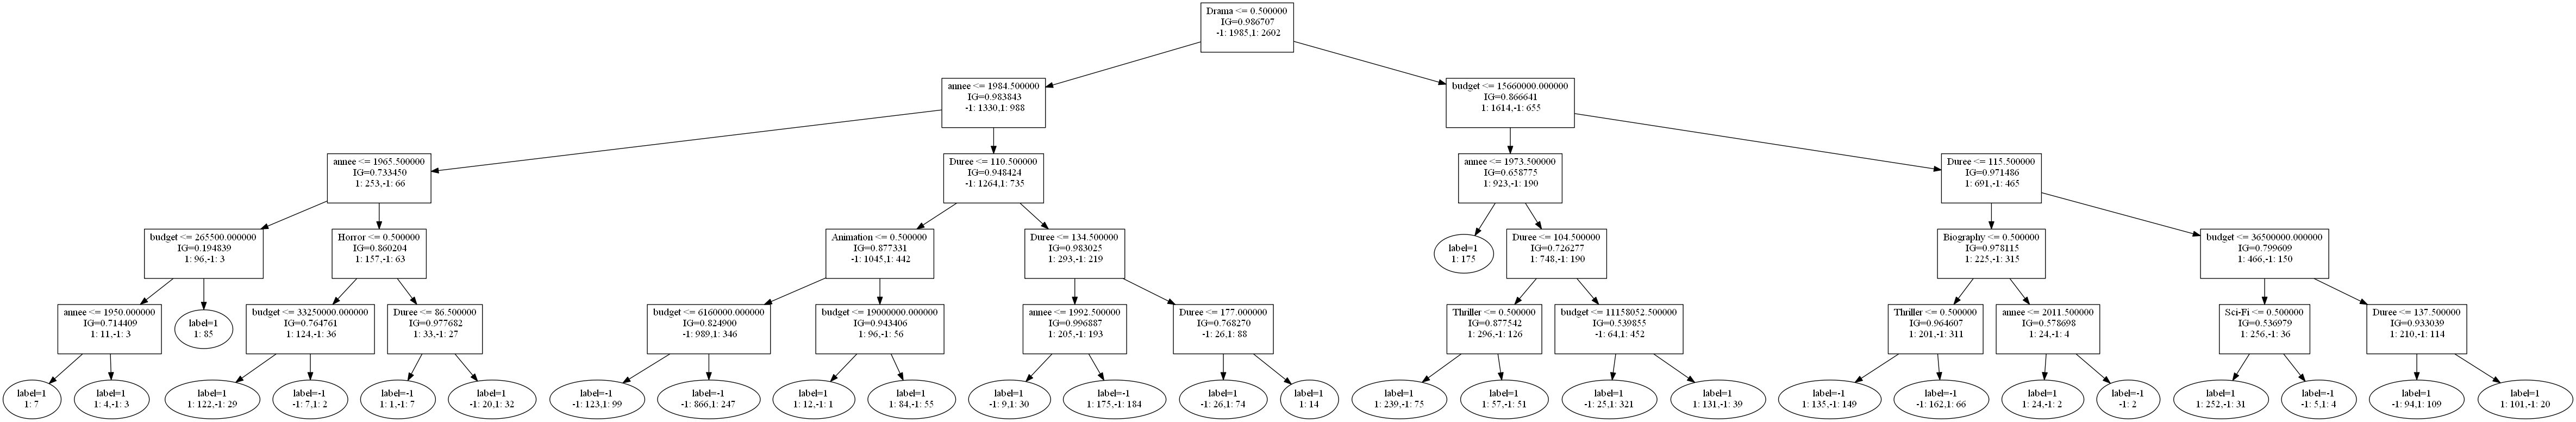

In [14]:
graph = pydot.graph_from_dot_data(dt.to_dot(fields))[0]
Image(graph.create_png())

In [40]:
#Q1.4/Q1.5/Q1.6

for i in range(2, 22, 2):
    dt = DecisionTree() 
    dt.max_depth = i
    dt.min_samples_split = 2 #nombre minimum d’exemples pour spliter un noeud 
    dt.fit(datax, datay)  
    print("le score de bonne classification pour la profondeur " + str(i) + " est :", dt.score(datax,datay)) 

    graph = pydot.graph_from_dot_data(dt.to_dot(fields))[0]
    dt.to_pdf("trees/tree_profondeur_" + str(dt.max_depth) + ".pdf",fields) 

le score de bonne classification pour la profondeur 2 est : 0.6825812077610639
le score de bonne classification pour la profondeur 4 est : 0.7314148681055156
le score de bonne classification pour la profondeur 6 est : 0.7575757575757576
le score de bonne classification pour la profondeur 8 est : 0.7889688249400479
le score de bonne classification pour la profondeur 10 est : 0.8210159145410943
le score de bonne classification pour la profondeur 12 est : 0.8502289077828646
le score de bonne classification pour la profondeur 14 est : 0.8750817527795945
le score de bonne classification pour la profondeur 16 est : 0.8890342271637236
le score de bonne classification pour la profondeur 18 est : 0.8960104643557881
le score de bonne classification pour la profondeur 20 est : 0.8984085458905603


La quantité d'exemples séparés à chaque niveau diminue en fonction de la profondeur, ce qui est attendu car a chaque niveau les noeuds travaillent sur une sous-ensemble des exemples qui ont déjà été séparés.

Les scores de bonne classification augmentent avec la profondeur. Cela est aussi atendu car plus l'arbre augmente, plu fine est la classification. 

Nèanmoins, les scores ne sont pas un indicateur ﬁable du comportement de l’algorithme car l'algorithme calcule cet score dans l'ensemble qui a été utilisé pour l'apprentissage. Il faut calculer le score sur une ensemble séparée.

In [19]:
#Q1.7

def separation_test_app(datax, datay, p_app = 0.5):
    index = np.arange(datax.shape[0])
    np.random.shuffle(index)
    nb_app = int(datay.shape[0] * p_app) 
    
    x_app, y_app = datax[index[:nb_app]], datay[index[:nb_app]]
    x_test, y_test = datax[index[nb_app:]], datay[index[nb_app:]]
    return x_test, y_test, x_app, y_app

In [20]:
profondeur = np.arange(2, 22, 2)

score_test = np.zeros((profondeur.shape[0], 3))
score_app = np.zeros((profondeur.shape[0], 3))

#On divise l'ensemble avec 3 proportions differentes: 
for j, p in enumerate([0.2, 0.5, 0.8]):
    datax_test, datay_test, datax_app, datay_app = separation_test_app(datax, datay, p_app = p)
    for i, prof in enumerate(profondeur):
        dt = DecisionTree() 
        dt.max_depth = prof
        dt.min_samples_split = 2 #nombre minimum d’exemples pour spliter un noeud 
        dt.fit(datax_app, datay_app) 
        score_test[i, j] = dt.score(datax_test, datay_test) 
        score_app[i, j] = dt.score(datax_app, datay_app) 

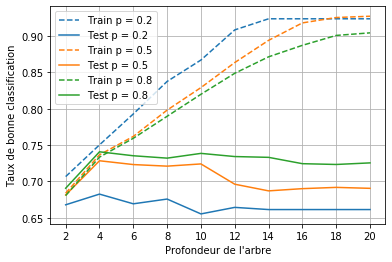

In [24]:
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(profondeur, score_app[:,0], label = "Train p = 0.2", color = "C0", linestyle = "dashed")
ax.plot(profondeur, score_test[:,0], label = "Test p = 0.2", color = "C0")
ax.plot(profondeur, score_app[:,1], label = "Train p = 0.5", color = "C1", linestyle = "dashed")
ax.plot(profondeur, score_test[:,1], label = "Test p = 0.5", color = "C1")
ax.plot(profondeur, score_app[:,2], label = "Train p = 0.8", color = "C2", linestyle = "dashed")
ax.plot(profondeur, score_test[:,2], label = "Test p = 0.8", color = "C2")
ax.set_xticks(profondeur)
ax.set_xlabel("Profondeur de l'arbre")
ax.set_ylabel("Taux de bonne classification")
ax.legend()
plt.show();

`#Q1.8/Q1.9`

On remarque que, quand il y a peu d'exemples en apprentissage (train, p = 0.2), le taux de bonne classification sur l'ensemble de test est plus petit que quand l'arbre de décision a plus d'exemples pour apprendre. Le taux de bonne classification sur l'ensemble d'apprentissage, au contraire, est plus grand que quand l'arbre de décision a plus d'exemples pour apprendre. Cela provient du fait que, avec peu d'exemples, l'arbre les apprend quasiment "par cœur" mais n'arrive pas à inférer des informations pour classifier correctement l'ensemble de test.

Lorsque l'on augmente la profondeur de l'arbre, le taux de bonne classification augmente sur l'ensemble d'apprentissage, mais pas sur l'ensemble de test. Pour l'ensemble de test, après une augmentation du taux lorsque l'on passe d'une profondeur de 2 à une profondeur de 4, celui-ci se stabilise quasiment pour les valeurs suivants de la profondeur, mais tend à se dégrader lorsque celle-ci augmente trop. Ce dernier phénomène est dû à la sur-apprentissage : avec une profondeur trop grande, l'arbre se conforme trop à l'ensemble d'apprentissage et commence à faire des erreurs sur l'ensemble de test.

In [25]:
#Q1.10 Validation Croisée

def partition(data_size, n):
    indice = np.arange(data_size)
    np.random.shuffle(indice)
    bloc = data_size // n 
    reste = data_size % n
    
    res = []
    initial = 0
    for j in range(n):
        if j < reste:
            res.append(indice[initial:initial + bloc + 1])
            initial += (bloc + 1)
        else:
            res.append(indice[initial:initial + bloc])
            initial += bloc
    return res        

In [30]:
def separation_vc(datax, datay, part, i):
    x_test = datax[part[i], :]
    y_test = datay[part[i]]
    indice = np.concatenate([part[j] for j in range(len(part)) if j != i])
    x_app = datax[indice, :]
    y_app = datay[indice]
    return x_test, y_test, x_app, y_app

In [33]:
quant_ens = [5, 10, 20]

score_test_vc = np.zeros((profondeur.shape[0], 3))
score_app_vc = np.zeros((profondeur.shape[0], 3))

#On divise les ensembles en differentes tailles: 
for j, quant in enumerate(quant_ens):
    part = partition(datax.shape[0], quant)
    for n in range(quant):
        datax_test, datay_test, datax_app, datay_app = separation_vc(datax, datay, part, n)
        for i, prof in enumerate(profondeur):
            dt = DecisionTree() 
            dt.max_depth = prof
            dt.min_samples_split = 2 #nombre minimum d’exemples pour spliter un noeud 
            dt.fit(datax_app, datay_app) 
            score_test_vc[i, j] += dt.score(datax_test, datay_test) / quant
            score_app_vc[i, j] += dt.score(datax_app, datay_app) / quant



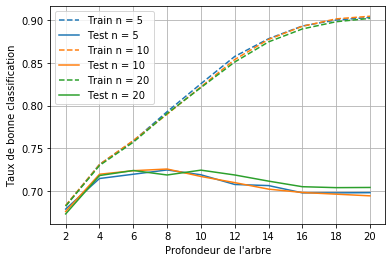

In [34]:
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(profondeur, score_app_vc[:,0], label = "Train n = 5", color = "C0", linestyle = "dashed")
ax.plot(profondeur, score_test_vc[:,0], label = "Test n = 5", color = "C0")
ax.plot(profondeur, score_app_vc[:,1], label = "Train n = 10", color = "C1", linestyle = "dashed")
ax.plot(profondeur, score_test_vc[:,1], label = "Test n = 10", color = "C1")
ax.plot(profondeur, score_app_vc[:,2], label = "Train n = 20", color = "C2", linestyle = "dashed")
ax.plot(profondeur, score_test_vc[:,2], label = "Test n = 20", color = "C2")
ax.set_xticks(profondeur)
ax.set_xlabel("Profondeur de l'arbre")
ax.set_ylabel("Taux de bonne classification")
ax.legend()
plt.show();

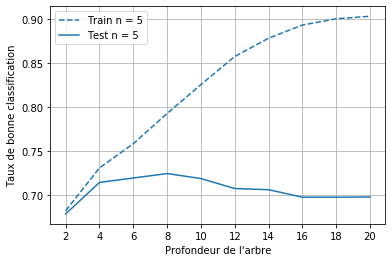

In [35]:
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(profondeur, score_app_vc[:,0], label = "Train n = 5", color = "C0", linestyle = "dashed")
ax.plot(profondeur, score_test_vc[:,0], label = "Test n = 5", color = "C0")
ax.set_xticks(profondeur)
ax.set_xlabel("Profondeur de l'arbre")
ax.set_ylabel("Taux de bonne classification")
ax.legend()
plt.show();

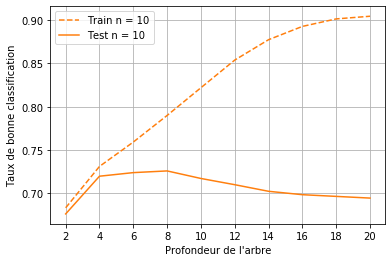

In [36]:
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(profondeur, score_app_vc[:,1], label = "Train n = 10", color = "C1", linestyle = "dashed")
ax.plot(profondeur, score_test_vc[:,1], label = "Test n = 10", color = "C1")
ax.set_xticks(profondeur)
ax.set_xlabel("Profondeur de l'arbre")
ax.set_ylabel("Taux de bonne classification")
ax.legend()
plt.show();

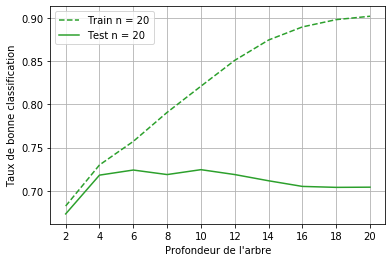

In [37]:
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(profondeur, score_app_vc[:,2], label = "Train n = 20", color = "C2", linestyle = "dashed")
ax.plot(profondeur, score_test_vc[:,2], label = "Test n = 20", color = "C2")
ax.set_xticks(profondeur)
ax.set_xlabel("Profondeur de l'arbre")
ax.set_ylabel("Taux de bonne classification")
ax.legend()
plt.show();